#### A simple example model for this tutorial

In [2]:
import pyhf
import numpy as np
model = pyhf.simplemodels.hepdata_like([6], [9], [3])
data  = [9] + model.config.auxdata

## The high-level API

If the only thing you are interested in is the hypothesis test result you can
just run the high-level API to get it:

In [3]:
pyhf.infer.hypotest(1.0,data,model,return_expected_set = True)

(array([0.16778329]), array([[0.0159666 ],
        [0.05465182],
        [0.16777638],
        [0.41861716],
        [0.74962797]]))

## Below the surface:

Under the hood, the hypothesis test computes *test statistics* and uses *calculators* in order to 
assess how likely the computed test statistic value is under various hypotheses

In [5]:
calc        = pyhf.infer.asymptotics.AsymptoticCalculator(data,model,qtilde = True)
dists       = calc.distributions(poi_test = 1.0)
teststat    = calc.teststatistic(poi_test = 1.0)

pyhf.infer.summarize_hypotest(teststat, dists, return_expected_set = True)

(array([0.16778329]), array([[0.0159666 ],
        [0.05465182],
        [0.16777638],
        [0.41861716],
        [0.74962797]]))

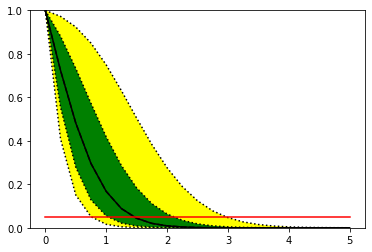

In [21]:
import pyhf.contrib.viz.brazil as brazil
import matplotlib.pyplot as plt
%matplotlib inline

testpoints = np.linspace(0,5,21)
results = [pyhf.infer.hypotest(x,data,model,return_expected_set=True) for x in testpoints]
f,ax = plt.subplots(1,1)
brazil.plot_results(ax,testpoints,results)